In [1]:
!pip3 install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Processing c:\users\rathi\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897\sklearn-0.0-py2.py3-none-any.whl
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=56a971b1201e077909d952bbebb6e8c33a74431deeeeaf86ddb7058d558262a2
  Stored in directory: c:\users\rathi\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76570 sha256=dd0f4dd9811d15a8b8865d6160641a7d32b93066594c5c2ac9c89

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pyldavis 3.3.1 requires numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
pyldavis 3.3.1 requires pandas>=1.2.0, but you'll have pandas 1.1.3 which is incompatible.
imbalanced-learn 0.8.0 requires scikit-learn>=0.24, but you'll have scikit-learn 0.23.2 which is incompatible.



  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.1-py3-none-any.whl size=17162 sha256=cbcef671b40857e991248ad43f588d0503cf4e6d883db7f5cd8c789c1e107fbc
  Stored in directory: c:\users\rathi\appdata\local\pip\cache\wheels\12\1a\8d\0c016e06370d07f82def661b6cb7d91d4e6b4ff7f2982e9f2c
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158162 sha256=2d5f9912119f288ff03853318a90fa7452fab844cff0490dc3d5d4d76e30b19d
  Stored in directory: c:\users\rathi\appdata\local\pip\cache\wheels\9d\de\6d\ca8d461ec29e010b1267d7353d0b058819770f7680bb9360e4
  Created wheel for databricks-cli: filename=databricks_cli-0.14.3-py3-none-any.whl size=100561 sha256=676f6cd6b4ae7070a2ed4e38e9884153538ab4d1984f87b2840cd73b67752e79
  Stored in directory: c:\users\rathi\appdata\local\pip\cache\wheels\e9\f3\dc\eeff77dbc147629fa716741fc216520abbc0e15ce4b876706f
Successfully built cufflinks umap-learn pyod pyLDAvis pynndescent prometheus-flask-exporter alembi

In [2]:
import pandas as pd 

In [5]:
df = pd.read_csv('downloads/loan_train_data.csv')

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [7]:
from pycaret.utils import version
version()

'2.3.0'

SETUP

In [8]:
from pycaret import classification

In [13]:
# making classification setup
setup = classification.setup(data= df, target='Personal Loan')

,Description,Value
0,session_id,2385
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
# classification Decision trees 

dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9643,0.8810,0.7778,0.8400,0.8077,0.7880,0.7887
1,0.9607,0.8790,0.7778,0.8077,0.7925,0.7708,0.7709
2,0.9786,0.9054,0.8148,0.9565,0.8800,0.8683,0.8717
3,0.9786,0.9220,0.8519,0.9200,0.8846,0.8728,0.8736
4,0.9893,0.9941,1.0000,0.9000,0.9474,0.9414,0.9430
5,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180,0.9180
6,0.9679,0.9160,0.8519,0.8214,0.8364,0.8185,0.8187
7,0.9929,0.9795,0.9630,0.9630,0.9630,0.9590,0.9590
8,0.9571,0.8968,0.8214,0.7667,0.7931,0.7692,0.7698
9,0.9821,0.9735,0.9630,0.8667,0.9123,0.9023,0.9039


In [18]:
boosting = classification.ensemble_model(dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9679,0.8830,0.7778,0.8750,0.8235,0.8059,0.8076
1,0.9643,0.8975,0.8148,0.8148,0.8148,0.7951,0.7951
2,0.9786,0.9054,0.8148,0.9565,0.8800,0.8683,0.8717
3,0.9821,0.9239,0.8519,0.9583,0.9020,0.8922,0.8940
4,0.9893,0.9941,1.0000,0.9000,0.9474,0.9414,0.9430
5,0.9750,0.9365,0.8889,0.8571,0.8727,0.8589,0.8590
6,0.9607,0.8955,0.8148,0.7857,0.8000,0.7782,0.7784
7,0.9893,0.9610,0.9259,0.9615,0.9434,0.9375,0.9377
8,0.9607,0.8988,0.8214,0.7931,0.8070,0.7852,0.7853
9,0.9821,0.9735,0.9630,0.8667,0.9123,0.9023,0.9039


In [19]:

classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9857,0.9953,0.8858,0.9666,0.9226,0.9148,0.9170,0.1060
rf,Random Forest Classifier,0.9850,0.9959,0.8601,0.9837,0.9159,0.9077,0.9113,0.1200
lightgbm,Light Gradient Boosting Machine,0.9832,0.9944,0.8599,0.9648,0.9073,0.8982,0.9011,0.1820
et,Extra Trees Classifier,0.9793,0.9894,0.7972,0.9863,0.8798,0.8687,0.8757,0.1090
dt,Decision Tree Classifier,0.9757,0.9306,0.8747,0.8768,0.8743,0.8609,0.8617,0.0100
ada,Ada Boost Classifier,0.9628,0.9750,0.7385,0.8608,0.7912,0.7711,0.7760,0.0560
lda,Linear Discriminant Analysis,0.9407,0.9554,0.5866,0.7545,0.6522,0.6209,0.6309,0.0130
ridge,Ridge Classifier,0.9360,0.0000,0.3728,0.9253,0.5237,0.4969,0.5595,0.0110
lr,Logistic Regression,0.9110,0.9213,0.3508,0.5331,0.4138,0.3705,0.3837,0.0280
svm,SVM - Linear Kernel,0.9039,0.0000,0.0111,0.0750,0.0194,0.0173,0.0266,0.0140


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2385, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

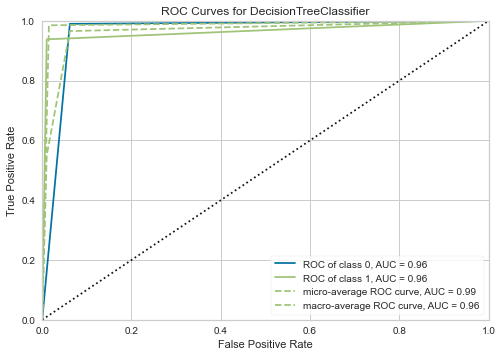

In [21]:
# AUC-ROC plot
classification.plot_model(dt, plot = 'auc')

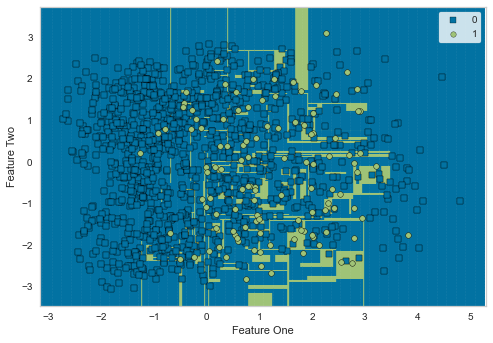

In [22]:
# Decision Boundary
classification.plot_model(dt, plot = 'boundary')

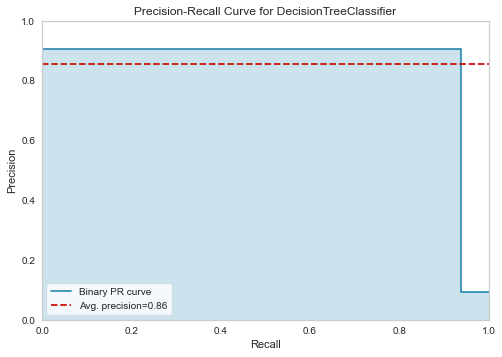

In [23]:
# Precision Recall Curve
classification.plot_model(dt, plot = 'pr')

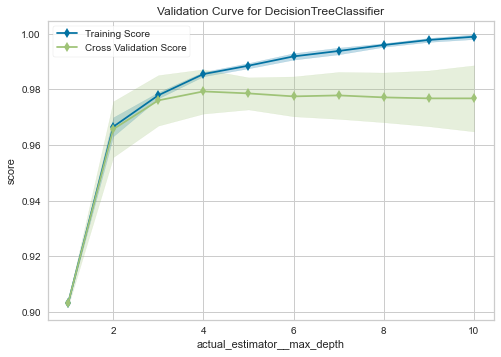

In [24]:
# Validation Curve
classification.plot_model(dt, plot = 'vc')

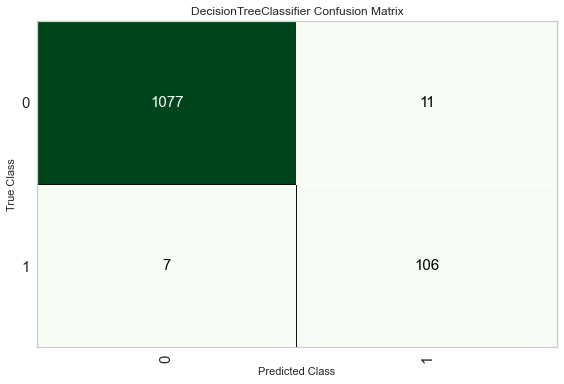

In [25]:
# Confusion Matrix
classification.plot_model(dt, plot = 'confusion_matrix')

In [26]:
classification.evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
df_test = pd.read_csv('downloads/loan_test_data.csv')

In [29]:
predictions = classification.predict_model(dt, data=df_test)

In [30]:
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,1.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,1.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,1.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,1.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,1.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,1.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,1.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,1.0


In [31]:
classification.save_model(dt, 'decision_tree_1')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Personal Loan',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', 

In [32]:
dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Successfully Loaded
